In [43]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (
    DecisionTreeClassifier as DTC,
    DecisionTreeRegressor as DTR,
    plot_tree, export_text
)
from sklearn.ensemble import (
    RandomForestRegressor as RF,
)
from ISLP.bart import BART

In [4]:
OJ = load_data('OJ')
OJ

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [5]:
model = MS(OJ.columns.drop('Purchase'), intercept=False)
D = model.fit_transform(OJ)
feature_names = list(D.columns)
X = np.asarray(D)
y = OJ['Purchase']

In [6]:
X

array([[2.3700e+02, 1.0000e+00, 1.7500e+00, ..., 0.0000e+00, 2.4000e-01,
        1.0000e+00],
       [2.3900e+02, 1.0000e+00, 1.7500e+00, ..., 0.0000e+00, 2.4000e-01,
        1.0000e+00],
       [2.4500e+02, 1.0000e+00, 1.8600e+00, ..., 9.1398e-02, 2.3000e-01,
        1.0000e+00],
       ...,
       [2.5700e+02, 7.0000e+00, 1.8600e+00, ..., 0.0000e+00, 3.2000e-01,
        0.0000e+00],
       [2.6100e+02, 7.0000e+00, 1.8600e+00, ..., 0.0000e+00, 2.7000e-01,
        0.0000e+00],
       [2.7000e+02, 1.0000e+00, 1.8600e+00, ..., 0.0000e+00, 3.2000e-01,
        1.0000e+00]])

In [15]:
y

0       CH
1       CH
2       CH
3       MM
4       CH
        ..
1065    CH
1066    CH
1067    MM
1068    CH
1069    CH
Name: Purchase, Length: 1070, dtype: category
Categories (2, object): ['CH', 'MM']

### (a)

In [8]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(
    X, y, train_size=800, random_state=0
)

In [10]:
X_train.shape

(800, 17)

### (b)

In [25]:
clf = DTC(criterion="entropy",  random_state=0)
clf.fit(X_train, y_train)

print(f'training error rate of clf: {1 - clf.score(X_train, y_train)}')

training error rate of clf: 0.008750000000000036


### (c)

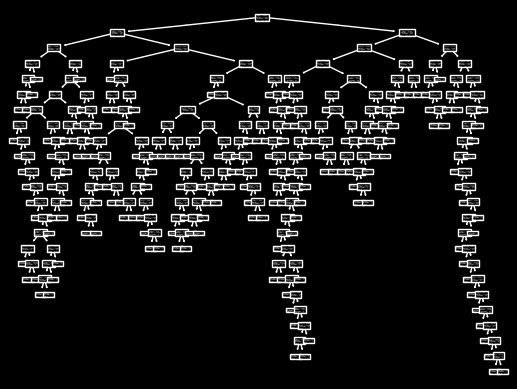

In [26]:
plot_tree(clf);

In [28]:
clf.get_n_leaves()

### This is quite a bushy tree, with very low training error. Probably overfitted.

168

### (d)

In [40]:
print(export_text(clf, feature_names=feature_names, show_weights=True))

## comments on the output:
## let's pick the first from the top "weights: [1.00, 0.00] class: CH"
##  The number of observations in that leaf: 1 , obtained from "weights: [1.00, 0.00]"
##  It means there is 1 'CH', and 0 'MM' observation. The leafe will predict class 'CH'.

|--- LoyalCH <= 0.51
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- STORE <= 2.50
|   |   |   |   |--- LoyalCH <= 0.00
|   |   |   |   |   |--- WeekofPurchase <= 269.50
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |   |   |   |--- WeekofPurchase >  269.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: MM
|   |   |   |   |--- LoyalCH >  0.00
|   |   |   |   |   |--- weights: [0.00, 3.00] class: MM
|   |   |   |--- STORE >  2.50
|   |   |   |   |--- weights: [0.00, 43.00] class: MM
|   |   |--- LoyalCH >  0.04
|   |   |   |--- WeekofPurchase <= 273.50
|   |   |   |   |--- SalePriceCH <= 1.94
|   |   |   |   |   |--- WeekofPurchase <= 263.50
|   |   |   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |   |   |--- WeekofPurchase <= 228.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |   |   |   |   |   |--- WeekofPurchase >  228.00
|   |   |   |   |   |   |   |   |--- LoyalCH <= 0.04
|   |   |   |

### (e)

In [42]:
y_pred = clf.predict(X_test)
y_pred

array(['MM', 'CH', 'CH', 'MM', 'CH', 'MM', 'MM', 'CH', 'CH', 'MM', 'CH',
       'CH', 'MM', 'CH', 'CH', 'CH', 'MM', 'MM', 'MM', 'MM', 'CH', 'CH',
       'MM', 'MM', 'MM', 'CH', 'CH', 'MM', 'CH', 'CH', 'MM', 'CH', 'MM',
       'CH', 'MM', 'CH', 'MM', 'MM', 'MM', 'MM', 'CH', 'MM', 'CH', 'CH',
       'MM', 'MM', 'MM', 'MM', 'CH', 'CH', 'CH', 'CH', 'CH', 'MM', 'CH',
       'MM', 'CH', 'CH', 'CH', 'MM', 'MM', 'CH', 'MM', 'CH', 'MM', 'CH',
       'MM', 'MM', 'CH', 'MM', 'MM', 'CH', 'CH', 'CH', 'CH', 'CH', 'MM',
       'MM', 'MM', 'CH', 'CH', 'CH', 'CH', 'MM', 'MM', 'CH', 'MM', 'CH',
       'MM', 'MM', 'MM', 'MM', 'CH', 'CH', 'CH', 'CH', 'CH', 'MM', 'CH',
       'CH', 'CH', 'CH', 'MM', 'CH', 'MM', 'CH', 'CH', 'MM', 'MM', 'CH',
       'MM', 'MM', 'CH', 'MM', 'MM', 'CH', 'CH', 'MM', 'CH', 'MM', 'CH',
       'CH', 'CH', 'MM', 'CH', 'CH', 'MM', 'CH', 'CH', 'MM', 'CH', 'MM',
       'CH', 'CH', 'CH', 'MM', 'CH', 'CH', 'MM', 'CH', 'MM', 'CH', 'CH',
       'MM', 'CH', 'CH', 'CH', 'CH', 'MM', 'MM', 'M

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7703703703703704

In [44]:
confusion = confusion_table(y_pred, y_test)
confusion

Truth,CH,MM
Predicted,,
CH,123,32
MM,30,85


### (f)

In [55]:
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(10, random_state=1, shuffle=True)
grid = skm.GridSearchCV(
    estimator=DTC(criterion='entropy', random_state=0), 
    param_grid={"ccp_alpha": ccp_path.ccp_alphas}, 
    refit=True, 
    cv=kfold, 
    scoring="accuracy"
)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.00094361, 0.00094361, 0.00106844, 0.00106844,
       0.00150402, 0.00155639, 0.00155639, 0.0017218 , 0.00182089,
       0.00191428, 0.00201205, 0.00201205, 0.00202281, 0.0020282 ,
       0.0020282 , 0.0020282 , 0.0020282 , 0....
       0.00368579, 0.00380598, 0.00389142, 0.00392806, 0.0040083 ,
       0.00405639, 0.00411875, 0.00426499, 0.00448109, 0.00456436,
       0.00456436, 0.00465469, 0.00465992, 0.00475013, 0.00508762,
       0.00514249, 0.00534987, 0.00536254, 0.00559983, 0.00584974,
       0.00590534, 0.0060732 , 0.00650472, 0.00659581, 0.00692612,
       0.00847498, 0.00899312, 0.00963416, 0.02303902, 0.03271777,
       0.03344416, 0.04577961, 0.26681033])},
             scoring='accuracy')

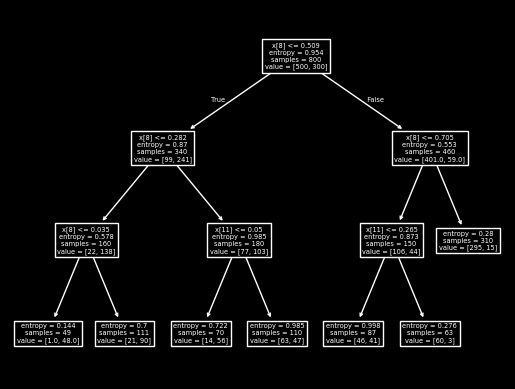

In [68]:
plot_tree(grid.best_estimator_);

### (g)

In [64]:
from sklearn.model_selection import cross_val_score

tree_sizes = []
cv_errors = []


for alpha in ccp_path['ccp_alphas']:
    clf_ = DTC(criterion="entropy", random_state=0, ccp_alpha=alpha)
    clf_.fit(X_train, y_train)
        
    tree_sizes.append(clf_.get_n_leaves())
        
    cv_score = cross_val_score(clf_, X_train, y_train, cv=kfold, scoring="accuracy")
    cv_error = 1 - np.mean(cv_score)
    cv_errors.append(cv_error)

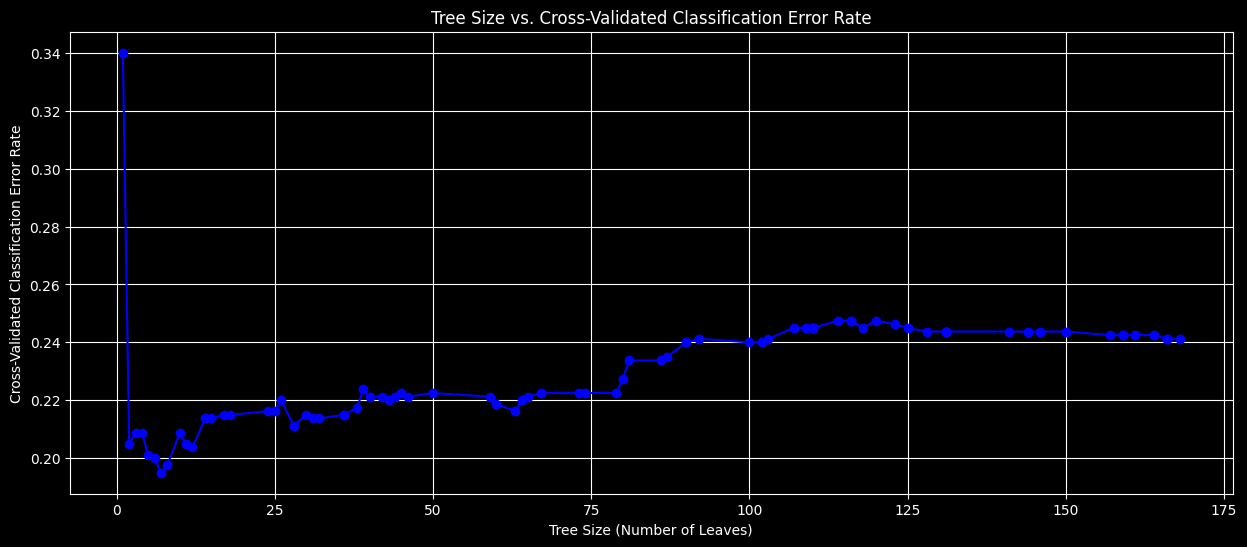

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(tree_sizes, cv_errors, marker="o", linestyle="-", color="b")
plt.xlabel("Tree Size (Number of Leaves)")
plt.ylabel("Cross-Validated Classification Error Rate")
plt.title("Tree Size vs. Cross-Validated Classification Error Rate")
plt.grid()
plt.show()


### (h)

Size of 6 gives lowest cross-validation error.

### (i)

we can obtain optimal tree from prev. grid search

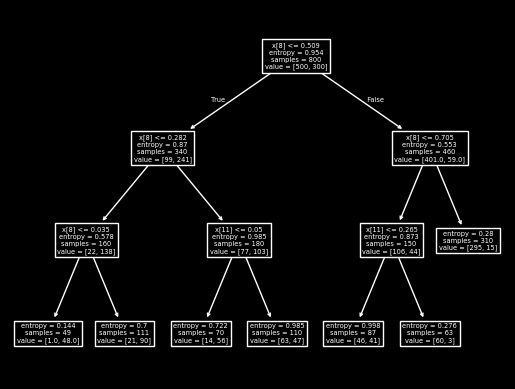

In [69]:
plot_tree(grid.best_estimator_);

### (j)


In [76]:
clf_unpruned = DTC(max_leaf_nodes=6, criterion="entropy",  random_state=0)
clf_unpruned.fit(X_train, y_train)

pruned = grid.best_estimator_

print(f"training error for unpruned tree: {1 - clf_unpruned.score(X_train, y_train)}")
print(f"training error for pruned tree: {1 - pruned.score(X_train, y_train)}")

## same training error

training error for unpruned tree: 0.1775
training error for pruned tree: 0.1775


### (k)

In [78]:
test_accuracy_unpruned = accuracy_score(y_test, clf_unpruned.predict(X_test))
test_accuracy_pruned = accuracy_score(y_test, pruned.predict(X_test))

print(f"test error for unpruned tree: {1 - test_accuracy_unpruned}")
print(f"test error for pruned tree: {1 - test_accuracy_pruned}")

## same test error

test error for unpruned tree: 0.18888888888888888
test error for pruned tree: 0.18888888888888888
